<a href="https://colab.research.google.com/github/Kai-Al/Kmeans-Twitter-RNA/blob/main/RNA_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 3

## Equipo de Arley Santiago Tangarife y Kai David Albornoz Madrigal

### RNA

In [4]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.utils import class_weight
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score

In [5]:
X, y = make_blobs(
        n_samples    = 500,
        n_features   = 2,
        centers      = 3,
        cluster_std  = 1.2,
        shuffle      = True,
        random_state = 0
       )

In [17]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import product
import pandas as pd

# Supongamos que tienes tus datos de entrenamiento en X_train y Y_train

neuronas_range = [5, 10, 15, 20]
num_layers_range = [1, 2, 3]

data = []

for num_layers in num_layers_range:
    for neuronas_combination in product(neuronas_range, repeat=num_layers):
        hidden_layers = tuple(neuronas_combination)

        model = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=1000, random_state=42)

        #Dividir los datos en conjuntos de entrenamiento y prueba
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        model.fit(X_train, Y_train)

        #Se predice si las X van a estar donde es
        Y_pred = model.predict(X_test)

        #Validar la presición del modelo
        accuracy = accuracy_score(Y_test, Y_pred)

        #Guardar la información para imprimir en tabla
        data.append([num_layers, hidden_layers ,accuracy])

# Crear un DataFrame de pandas
df = pd.DataFrame(data, columns=['Num of Layers','Hidden_layers', 'Accuracy'])

# Imprimir la tabla
print(df)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


    Num of Layers Hidden_layers  Accuracy
0               1          (5,)  0.873333
1               1         (10,)  0.866667
2               1         (15,)  0.853333
3               1         (20,)  0.860000
4               2        (5, 5)  0.853333
..            ...           ...       ...
79              3  (20, 15, 20)  0.866667
80              3   (20, 20, 5)  0.866667
81              3  (20, 20, 10)  0.860000
82              3  (20, 20, 15)  0.866667
83              3  (20, 20, 20)  0.853333

[84 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
df_sorted = df.sort_values(by=df.columns[2], ascending=False)

# Imprimir el DataFrame ordenado
print(df_sorted)

#El mejor modelo es el 0, que contiene una capa oculta y 5 neuronas, que tiene un porcentaje de presición del 87,3%

    Num of Layers Hidden_layers  Accuracy
21              3    (5, 5, 10)  0.886667
54              3   (15, 5, 15)  0.886667
52              3    (15, 5, 5)  0.880000
0               1          (5,)  0.873333
23              3    (5, 5, 20)  0.873333
..            ...           ...       ...
43              3  (10, 10, 20)  0.860000
4               2        (5, 5)  0.853333
2               1         (15,)  0.853333
83              3  (20, 20, 20)  0.853333
60              3   (15, 15, 5)  0.846667

[84 rows x 3 columns]


### Ejercicio K Means

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/usuarios-twitter.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
print(df.columns)

Index(['usuario', 'op', 'co', 'ex', 'ag', 'ne', 'wordcount', 'categoria'], dtype='object')


In [45]:
df

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...,...
135,XabiAlonso,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,XaviRodriguez,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,ZacEfron,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


In [53]:
# Selecciona las tres columnas que deseas utilizar
data = df[["ex", "ag", "ne"]]

data

,ex,ag,ne
0,41.948819,29.370315,9.841575
1,37.938947,24.279098,10.362406
2,38.999896,34.645521,8.836979
3,52.337538,31.082154,5.032231
4,48.530806,31.138871,7.305968
...,...,...,...
135,38.904885,31.624351,12.201221
136,48.533125,40.096458,11.764583
137,27.571210,19.093548,3.241935
138,36.465344,23.008168,7.284962


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

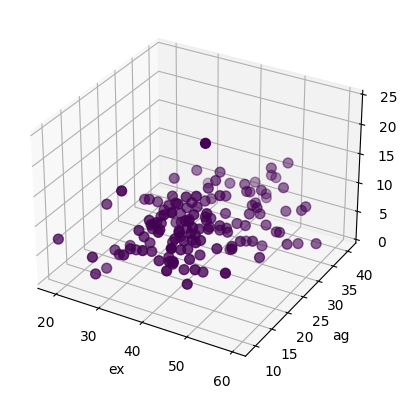

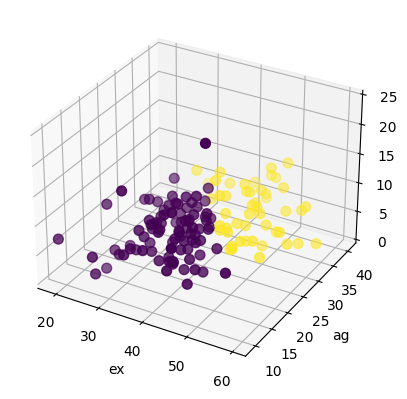

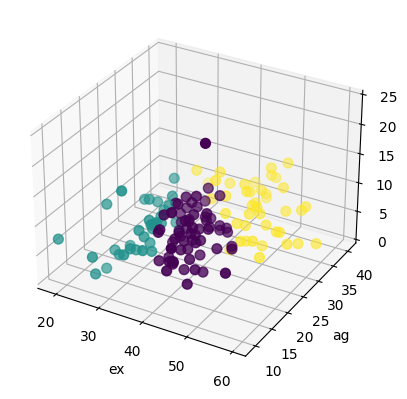

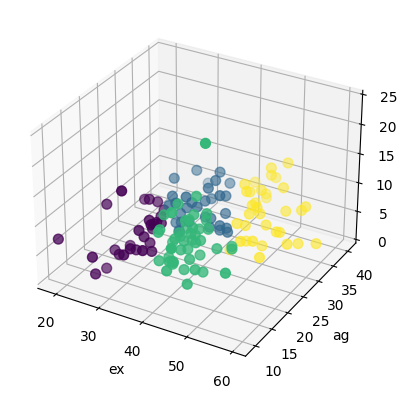

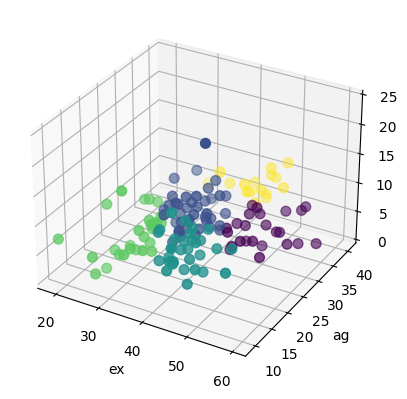

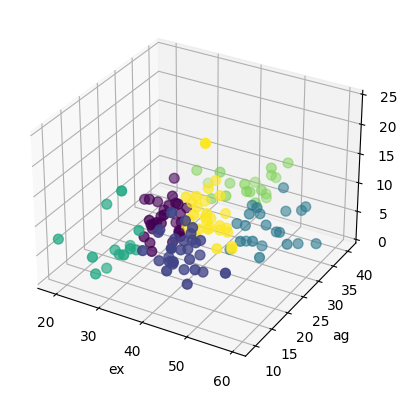

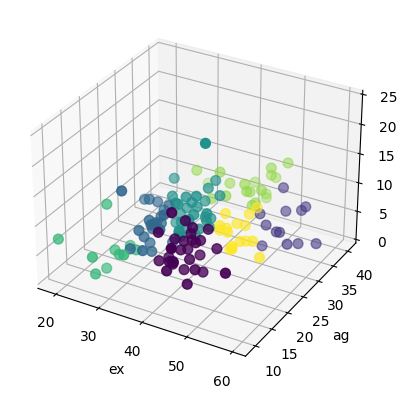

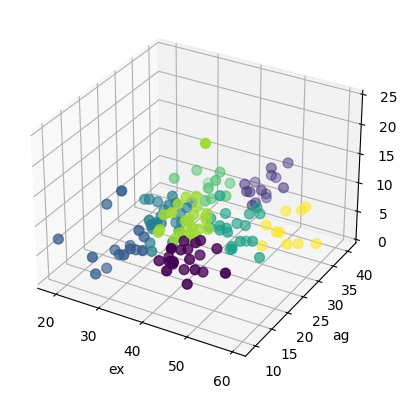

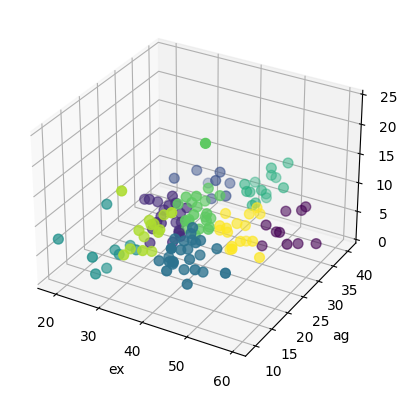

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Crea una lista para almacenar el porcentaje de varianza explicada
explained_variance = []

# Prueba diferentes valores de k (número de clústeres)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    # Calcula el porcentaje de varianza explicada
    explained_variance.append(kmeans.score(data))
    Y2 = kmeans.predict(data)
       # Grafica los datos con los clústeres asignados
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data['ex'], data['ag'], data['ne'], c=Y2, cmap='viridis', s=50)
    ax.set_xlabel('ex')
    ax.set_ylabel('ag')
    ax.set_zlabel('ne')

# Normaliza el porcentaje de varianza para que esté en el rango [0, 1]
explained_variance = [1 - (ev / explained_variance[0]) for ev in explained_variance]

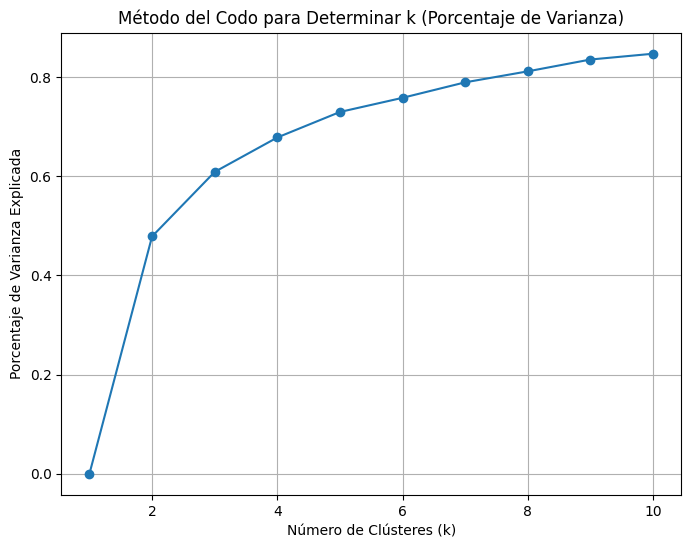

0.0
0.4785985928169041
0.6087514266941783
0.6781786844065884
0.729626760055996
0.758157599299203
0.7894124971018877
0.8115792543544285
0.8353937596932044
0.8470900559074395


In [64]:
# Graficar el porcentaje de varianza explicada en función de k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), explained_variance, marker='o')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.title('Método del Codo para Determinar k (Porcentaje de Varianza)')
plt.grid(True)
plt.show()

for varr in explained_variance:
  print(varr)

Elegimos 3 cluster, que representa un porcentaje de varianza adecuado y significativa en comparación de lo demás.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0, 'ne')

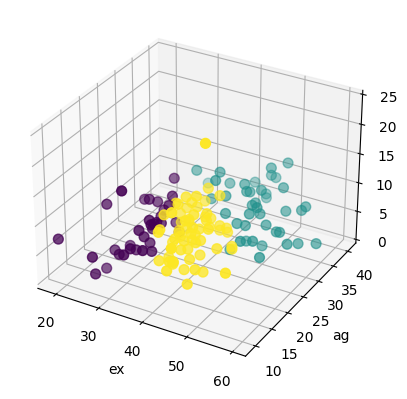

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Se eligen 3 clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data)
Y2 = kmeans.predict(data)
# Grafica los datos con los clústeres asignados
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['ex'], data['ag'], data['ne'], c=Y2, cmap='viridis', s=50)
ax.set_xlabel('ex')
ax.set_ylabel('ag')
ax.set_zlabel('ne')

In [75]:
data

,ex,ag,ne,cluster
0,41.948819,29.370315,9.841575,1
1,37.938947,24.279098,10.362406,2
2,38.999896,34.645521,8.836979,1
3,52.337538,31.082154,5.032231,1
4,48.530806,31.138871,7.305968,1
...,...,...,...,...
135,38.904885,31.624351,12.201221,1
136,48.533125,40.096458,11.764583,1
137,27.571210,19.093548,3.241935,0
138,36.465344,23.008168,7.284962,2


In [81]:
# Obtener las características de los datos que componen cada cluster
for cluster_label in range(3):
    cluster_data = data[data['cluster'] == cluster_label]
    print(f"Características del Cluster {cluster_label}:")
    print(cluster_data)

Características del Cluster 0:
            ex         ag         ne  cluster
12   34.104318  18.771818   8.867197        0
22   18.693542   9.682292   7.200208        0
39   35.376179  23.747561   4.934065        0
44   35.290973  15.793009   5.702301        0
45   31.135698  20.439651  11.337791        0
53   28.902609  14.337043   4.473304        0
56   30.966260  23.053053   9.577863        0
58   31.227724  27.689919  11.420325        0
59   33.090000  21.330698   8.405426        0
60   34.040957  16.767979  10.229043        0
63   33.121827  12.412404   7.410577        0
66   26.855564  15.602331   4.110075        0
67   26.988702   9.948168   2.979542        0
68   35.326250  16.510208  10.034583        0
71   33.345984  14.643386   9.434488        0
75   33.237462  16.194154   7.531000        0
82   31.194545  16.385000   4.713864        0
84   34.458231  23.982462   6.296462        0
88   35.778281  15.101563  10.714609        0
90   36.152326  12.157829   7.942403        0
91 

In [82]:
# Supongamos que tienes un DataFrame llamado "data" con una columna "cluster" que indica la pertenencia a un cluster

# Calcular el promedio de las características por cluster
cluster_means = data.groupby('cluster').mean()

# Imprimir los promedios de características por cluster
print("Promedios de características por cluster:")
print(cluster_means)

Promedios de características por cluster:
                ex         ag        ne
cluster                                
0        31.469831  17.399364  7.880271
1        46.717884  32.570492  7.304606
2        41.636375  19.483911  8.510327


# Conclusión


- Ex -> Grado de timidez
- Ag -> Grado de empatia
- Ne -> Grado de nervioso

En los 3 grupos, el nivel de nerviosismo es similar, asi que esta variable no define los grupos fuertemente.

- Grupo 0 -> Poco timidos y poco empaticos
- Grupo 1 -> Muy timidos y muy empaticos
- Grupo 2 -> Muy timidos y poco empaticos

El grupo 0, sería el grupo de personas reservadas. El grupo 1, sería el grupo de sensibles y el grupo 3 sería el grupo de personas introvertidas.

